# Problem Discription
**inspiration:**

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university. 

**Content:**
* The dataset contains several parameters which are considered important during the application for Masters Programs.
* The parameters included are :
   * GRE Scores ( out of 340 )
   * TOEFL Scores ( out of 120 )
   * University Rating ( out of 5 )
   * Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
   * Undergraduate GPA ( out of 10 )
   * Research Experience ( either 0 or 1 )
   * Chance of Admit ( ranging from 0 to 1 )
   
**Task Details:**
* Using the supplied predictive variables (GRE score, TOEFL score, University Rating, etc) to predict the likelihood of admission of a new candidate. 


# Hypothesis
* Higher the GRE score and TOFEL score more chances to get an addmision
* University rate also effected on addmission(Higher is better)
* Undergraduate GPA effects in GRE and TOFEL score, these are effected by Graduate admissions

# Data Exploration and Transformation
In order to understand the data and gain insides, Certain steps that's have to be followed

**1.Reading the data**

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data=pd.read_csv("datasets_14872_228180_Admission_Predict_Ver1.1.csv")

In [4]:
data.shape

(500, 9)

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

* read the column names by using data.columns and i found that there was a space after Chance Of Admit and even the LOR had a space after it.
* make the columns name a valid python identifier. Because later it can be used as the valid python identifier

In [6]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [7]:
data = data.rename(columns={'GRE Score': 'GRE Score', 'TOEFL Score': 'TOEFL Score', 'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'})
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Chance of Admit** is our target variable , It is continous in nature. This problem is called **REGRESSION PROBLEM**

**2.Variable Identfication**

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- The describe function works only for continuous variables
- We can identify the number of missing values from the 'count' given
- Comparing the 75% and the max value, determine presence of outliers

In [9]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- Count can be used to find out missing values
- Gives unique values for categorical variables

**3.Variable identification**

In [10]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

There no categorical variables. Our work is much easier now.....

**4.Univariate analysis**

Explore the methods depends in type of variable.

Text(0.5, 0, 'Chances')

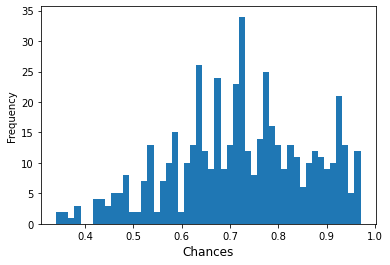

In [11]:
## target variable 

data['Chance of Admit'].plot.hist(bins=50)

plt.xlabel('Chances', fontsize=12)

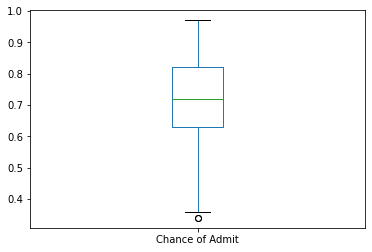

In [12]:
data['Chance of Admit'].plot.box()

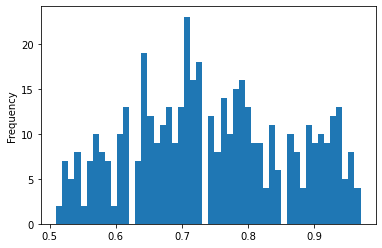

In [13]:
#removing outliers
(data['Chance of Admit'].loc[data['Chance of Admit']>0.5]).plot.hist(bins=50)


Text(0.5, 0, 'SCORE')

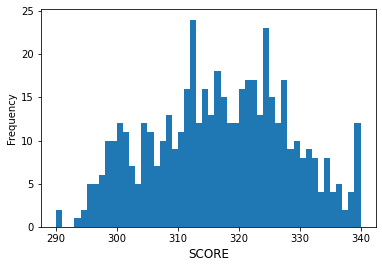

In [14]:
data['GRE Score'].plot.hist(bins=50)
plt.xlabel('SCORE', fontsize=12)

maximum students are getting above 310 GRE score

Text(0.5, 0, 'SCORE')

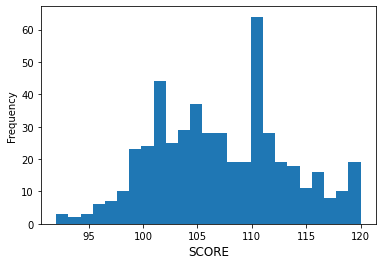

In [15]:
data['TOEFL Score'].plot.hist(bins=25)
plt.xlabel('SCORE', fontsize=12)

Text(0.5, 0, 'Rating')

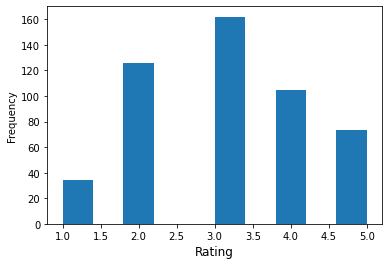

In [16]:
data['University Rating'].plot.hist()
plt.xlabel('Rating', fontsize=12)

* Less number of students getting low rating
* maximum students getting between 3 to 3.5 rating

Text(0.5, 0, 'Rating')

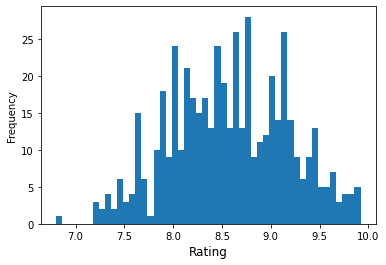

In [17]:
data['CGPA'].plot.hist(bins =50)
plt.xlabel('Rating', fontsize=12)

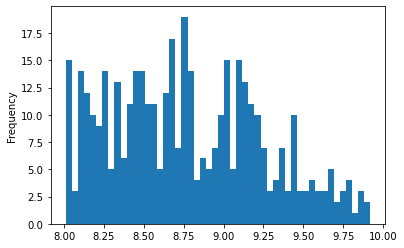

In [18]:
#removing outliers
(data['CGPA'].loc[data['CGPA']>8.0]).plot.hist(bins=50)


In [19]:
data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

219 students have the research experiance and 181 student haven't.


**5.Bivariate analysis**

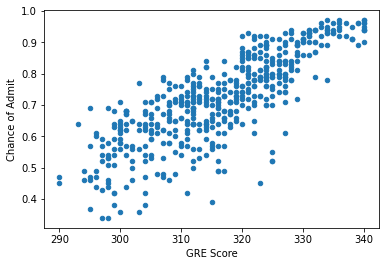

In [20]:
data.plot.scatter('GRE Score', 'Chance of Admit')

In [21]:
data['GRE Score'].corr(data["Chance of Admit"])

0.81035063546326

More the GRE Score , More Possibility to get admit.

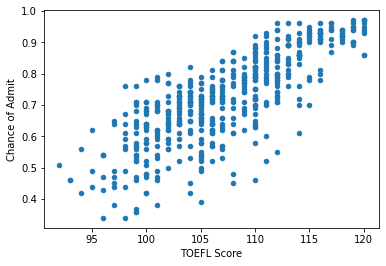

In [22]:
data.plot.scatter('TOEFL Score', 'Chance of Admit')

In [23]:
data['TOEFL Score'].corr(data["Chance of Admit"])

0.7922276143050829

Compare to the GRE , TOEFL is less correlation with **Chance of Admit**

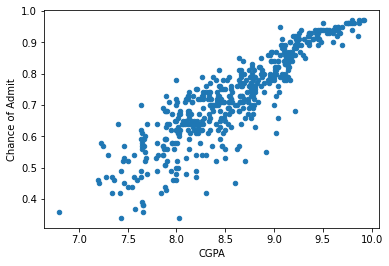

In [24]:
a=data.plot.scatter('CGPA', 'Chance of Admit')

In [25]:
data['CGPA'].corr(data["Chance of Admit"])

0.8824125749045745

Maximu CGPA defines the Chance of Admit

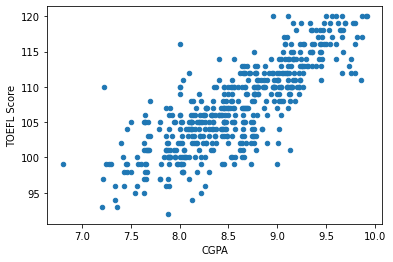

In [26]:
data.plot.scatter('CGPA', 'TOEFL Score')

In [27]:
data['CGPA'].corr(data["TOEFL Score"])

0.8105735363036222

In [28]:
data['CGPA'].corr(data["GRE Score"])

0.8258779536403552

more CGPS than the student definatly get a good score in GRE and TOEFL

**6.Missing values**

In [29]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There is no missing values present in the data set

# Building The Model

    In a model building part we use a 'sktlearn' library.
    we use sklearrn in:
    'Preprocessing' ; 
    'Model Selection' ;
    'Model Building' ;
    'Model Evalution'; sklearn assest us to evalute the performance of the model

## Linear Regression Model

In [30]:
data.drop(['Serial No.'], axis=1, inplace = True)

### Segregating variables: Independent and Dependent Variables

In [31]:
#seperating independent and dependent variables
x = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']
x.shape, y.shape

((500, 7), (500,))

### Splitting the data into train set and the test set

In [32]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing Linear Regression

In [33]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [34]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)


LinearRegression(normalize=True)

In [35]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.040790349302197326


In [36]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.046844629278722245


### Model Evaluation - RMSLE

In [37]:
from sklearn.metrics import mean_squared_log_error

In [38]:
pred_train = lr.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y,pred_train))

In [39]:
pred_test = lr.predict(test_x)
test_score=np.sqrt(mean_squared_log_error(test_predict, test_y))

In [40]:
print('Training score:', train_score)
print('Validation score:', test_score)

Training score: 0.03526928969106591
Validation score: 0.04202523499435959


## Checking assumptions of Linear Model

In [ ]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head(10)


In [42]:
len(residuals.residuals[:])

125

### Plotting residual curve (Is there constant Variance OR Homoscedastic?)

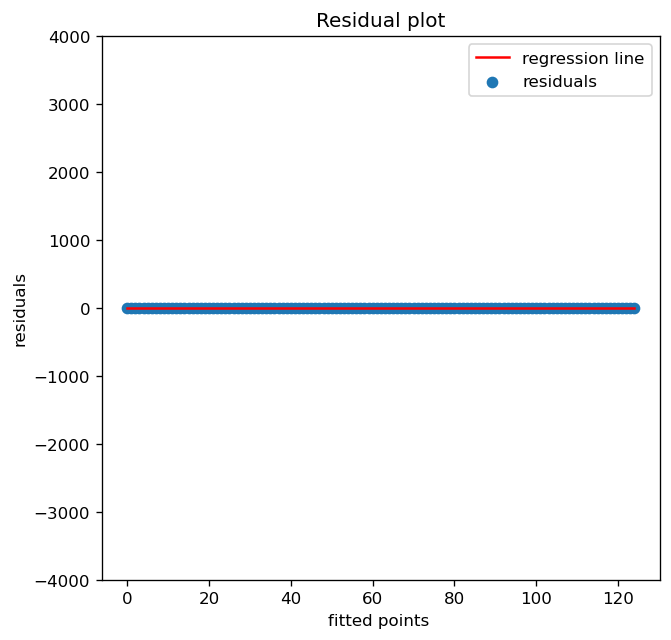

In [43]:
plt.figure(figsize=(6, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,125)
k = [0 for i in range(0,125)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

### QQ-Plot (Is the data Normally Distributed?)

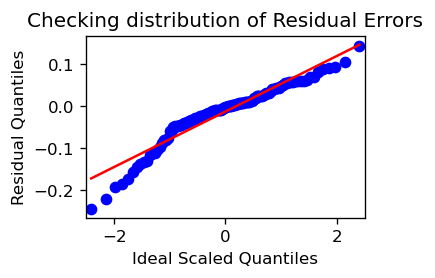

In [44]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(3,2) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

* The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.
* From the ACF plot, we can clearly see that there is almost negligible correlation between the error terms. Hence there is no autocorrelation present in the data.

# FINAL_SCORE for our model

In [45]:
test=lr.score(test_x, test_y)*100
train=lr.score(train_x, train_y)*100
print("Accuracy on train set:",train)
print("Accuracy on test set:",test)

Accuracy on train set: 82.70466368162613
Accuracy on test set: 80.01265659848332


**Get 80% Accuracy**